# Importing Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# yfinance library is used to get the dataset

In [2]:
import yfinance as yf

In [3]:
df = yf.download('NVDA',start='2023-06-01',end='2025-06-12') #we are working with the NVDA(Nvidia) dataset where we start date is of 1st JAN 2023 till end date 12h JUNE 2025
df.sample(5)#df.sample is used for the random top 5 values of the dataset

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2024-08-21,128.459427,129.309165,126.620012,127.279799,257883600
2024-06-06,120.949852,125.537023,118.272916,123.998634,664696000
2024-04-22,79.486359,80.041138,76.369603,78.072920,596341000
2024-10-31,132.729431,137.578321,132.079587,137.568329,270039600
2024-05-22,94.912224,95.981798,93.211904,95.421024,548648000


In [4]:
df.isnull().sum()#using isnull().sum() we are getting to know that there is no need of preprocessing as data doesn't have any missing value or duplicate or NAN values

,,0
Price,Ticker,
Close,NVDA,0
High,NVDA,0
Low,NVDA,0
Open,NVDA,0
Volume,NVDA,0


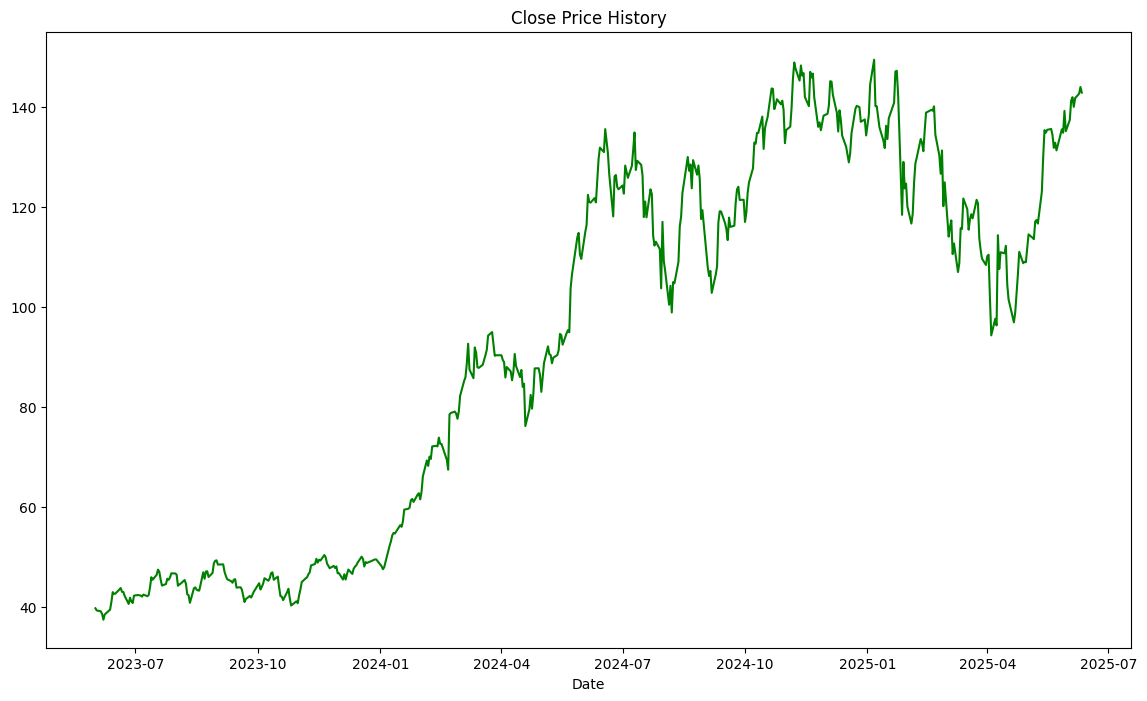

In [5]:
#in this cell we are getting the chart of the Close Price of the NVDA dataset based on the dates (we are working with single column in dataset)
plt.figure(figsize=(14,8))
plt.plot(df.index,df['Close'],label='Close Price',color='green')
plt.xlabel('Date')
plt.ylabel=('Close Price in $')
plt.title('Close Price History')
plt.show()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose #seasonal_decompose library is use to notice the seasonal pattern in the dataset where using seasonal_decompose we get the trend , seasonal and residual error(resid)

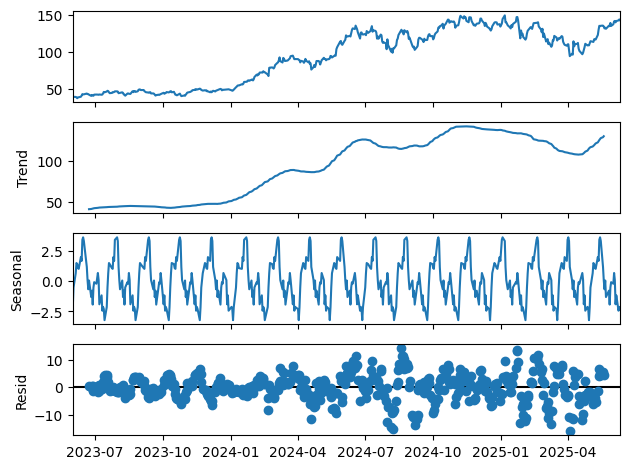

In [7]:
result = seasonal_decompose(df['Close'],model='additive',period=30)
result.plot()
plt.show()

In [8]:
len(df)#this is used to get the len of the dataset

509

In [9]:
#in this cell we are splitting the dataset based on the length of the actual dataset n splitting in the ratio as 80% training and 20%testing data using the iloc method
train = df.iloc[:408]
test = df.iloc[408:]

In [10]:
#in this cell we are using the MINMAXSCALER library as in the LSTM it is necessary to have the value range between 0-1 so for that we are using minmaxscaler library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [11]:
df.head(),df.tail()#here we can see the value for the close column ranges in the number more 1 so by fitting minmax method we can get the value between 0-1

(Price           Close       High        Low       Open     Volume
 Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
 Date                                                             
 2023-06-01  39.741428  40.021226  38.312455  38.461347  635873000
 2023-06-02  39.298744  40.470902  39.029936  40.068191  482731000
 2023-06-05  39.142864  39.536578  38.679197  38.881051  396094000
 2023-06-06  38.626236  39.131873  38.120599  38.802112  388729000
 2023-06-07  37.451950  39.474707  37.333024  38.891067  511998000,
 Price            Close        High         Low        Open     Volume
 Ticker            NVDA        NVDA        NVDA        NVDA       NVDA
 Date                                                                 
 2025-06-05  139.980286  143.990002  138.820363  142.160127  231397900
 2025-06-06  141.710159  143.260055  141.500167  142.500098  153986200
 2025-06-09  142.620102  144.989932  141.930147  143.180061  185114500
 2025-06-10  143.950012  144.279976  

In [12]:
#here we are fitting the column Close n tranform it to range of 0-1
scaler.fit(train[['Close']])
scaled_train = scaler.transform(train[['Close']])
scaled_test = scaler.transform(test[['Close']])

In [13]:
scaled_train[:10]#here example value for last 10 values

array([[0.02045018],
       [0.01649602],
       [0.01510366],
       [0.01048901],
       [0.        ],
       [0.00923922],
       [0.01156016],
       [0.01791605],
       [0.03166323],
       [0.04929353]])

In [14]:

!pip install keras#needed library for the LSTM model

ERROR: Invalid requirement: 'keras#needed': Expected end or semicolon (after name and no valid version specifier)
    keras#needed
         ^


In [15]:
!pip install tensorflow

In [16]:
#from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator is a Python import statement that makes the,
#TimeseriesGenerator class directly accessible by its name from its specific location within the tensorflow.keras library, simplifying its usage in the code.
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [112]:
#This code sets up a data generator for a time series neural network. It means the model will learn to predict the next value by looking at the preceding 15 time steps,
# using only one feature from your `scaled_train` data, and processes the data one sample at a time for training.
n_input = 45
n_features = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)

In [113]:
print(len(scaled_train),len(generator))

408 363


In [114]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [115]:
model = Sequential()# This is a constructor from Keras that creates a linear stack of layers. It means you'll add layers to the model one after another, and data will flow sequentially from one layer to the next.
model.add(LSTM(50,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))#This adds a Dense (or fully connected) layer. This is typically the output layer for regression tasks.
model.compile(optimizer='adam',loss='mse')

In [116]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
model.fit(generator,epochs=100)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0456
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.0033
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0031
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0027
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0023
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0022
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - loss: 0.0017
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0019
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0016
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0017
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0019
Epoch 12/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0017
Epoch 13/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0012
Epoch 14/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0011
Epoch 15/100
363/363 ━━━━━━━

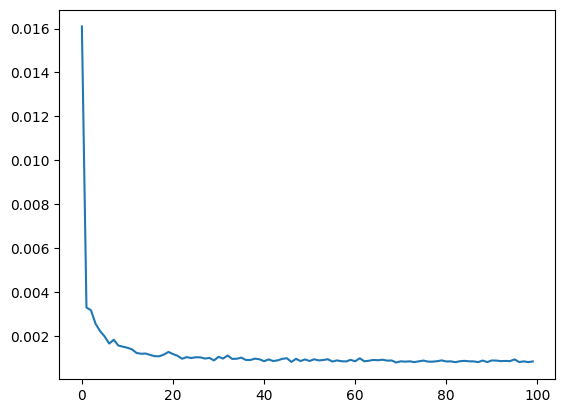

In [118]:
loss_per_epoch= model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [119]:
last_train_batch  = scaled_train[-45:]


In [120]:
last_train_batch = last_train_batch.reshape((1,n_input,n_features))

In [121]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


array([[0.8727813]], dtype=float32)

In [122]:
scaled_test[0]

array([0.8583576])

In [123]:
test_prediction = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_prediction.append(current_pred)
  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━

In [124]:
test_prediction

[array([0.8727813], dtype=float32),
 array([0.86794376], dtype=float32),
 array([0.85160285], dtype=float32),
 array([0.83746386], dtype=float32),
 array([0.8255685], dtype=float32),
 array([0.81511694], dtype=float32),
 array([0.8055459], dtype=float32),
 array([0.7965698], dtype=float32),
 array([0.7880601], dtype=float32),
 array([0.7799599], dtype=float32),
 array([0.77224076], dtype=float32),
 array([0.7648836], dtype=float32),
 array([0.75787246], dtype=float32),
 array([0.7511924], dtype=float32),
 array([0.74482864], dtype=float32),
 array([0.7387672], dtype=float32),
 array([0.73299444], dtype=float32),
 array([0.7274973], dtype=float32),
 array([0.72226316], dtype=float32),
 array([0.71728], dtype=float32),
 array([0.7125363], dtype=float32),
 array([0.70802104], dtype=float32),
 array([0.7037237], dtype=float32),
 array([0.6996342], dtype=float32),
 array([0.6957428], dtype=float32),
 array([0.6920402], dtype=float32),
 array([0.6885176], dtype=float32),
 array([0.6851664], 

In [125]:
test.head()

Price,Close,High,Low,Open,Volume,Predictions
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,
2025-01-16,133.548447,138.727603,133.468458,138.617620,209235600,138.252427
2025-01-17,137.687775,138.477640,135.438138,136.667935,201188800,139.940062
2025-01-21,140.807266,141.807105,137.067865,139.137538,197749000,141.476327
2025-01-22,147.046280,147.766150,143.646819,144.636665,237651400,142.902822
2025-01-23,147.196243,147.206236,143.696808,145.026595,155915500,144.217752


In [126]:
true_predictions = scaler.inverse_transform(test_prediction)

In [127]:
test['Predictions'] = true_predictions

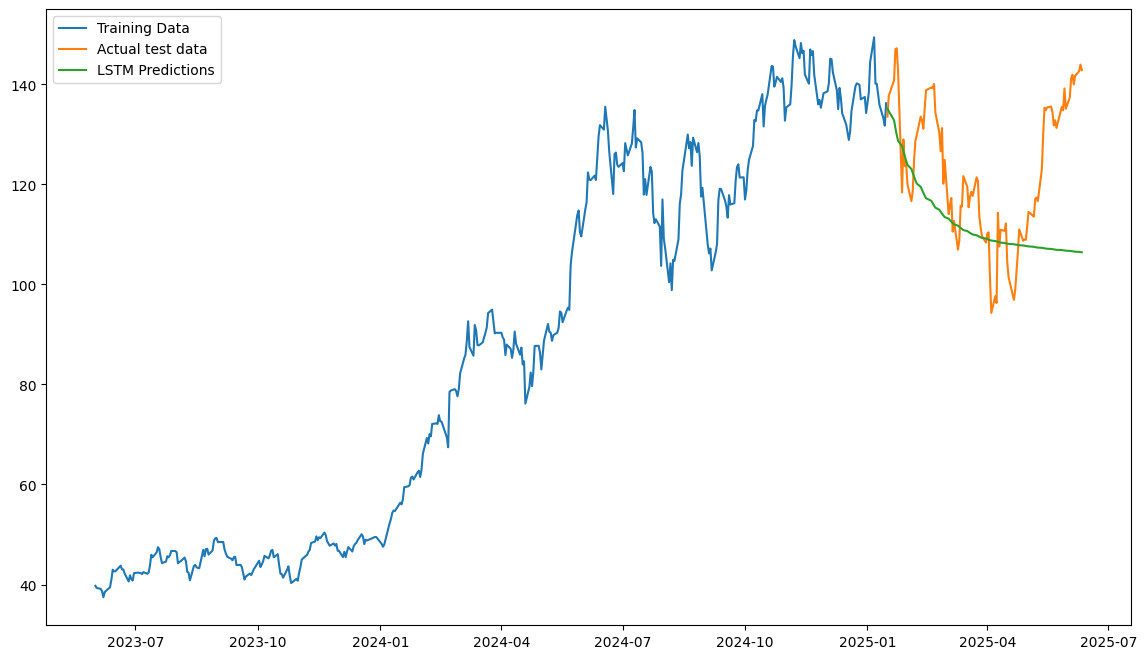

In [128]:
plt.figure(figsize=(14,8))
plt.plot(train['Close'],label='Training Data')
plt.plot(test['Close'],label='Actual test data')
plt.plot(test['Predictions'],label='LSTM Predictions')
plt.legend()
plt.show()

In [129]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [130]:
rmse = sqrt(mean_squared_error(test['Close'],test['Predictions']))
print(rmse)

16.408800706545787
